In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import japanize_matplotlib

In [2]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    interval_ms=0,
    threshold=0,
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    # サンプリング周波数
    sampling_rate = df.shape[0] / df['time'].iloc[-1]
    print(f'サンプリング周波数: {sampling_rate} Hz')

    df_diff = {"time": [], "diff": []}
    if threshold > 0 and interval_ms > 0:
        interval = math.floor(sampling_rate * interval_ms / 1000)

        for i in range(0, df.shape[0], interval):
            df_cut = df.iloc[i:i + interval]
            min_norm = df_cut['norm'].min()
            max_norm = df_cut['norm'].max()
            start_time = df_cut['time'].iloc[0]
            end_time = df_cut['time'].iloc[-1]

            df_diff["time"].append((start_time+end_time)/2)
            df_diff["diff"].append(max_norm - min_norm)

            if max_norm - min_norm > threshold:
                plt.axvspan(
                    start_time,
                    end_time,
                    color='gray',
                    alpha=0.2
                )
        plt.plot(df_diff["time"], df_diff["diff"])

    plt.legend()

    plt.show()


In [3]:
file_path = "./logs/tokyo/"
df_mag = pd.read_csv(
    f"{file_path}Magnetometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)


In [4]:
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

df_gyro['x_rotate'] = np.cumsum(df_gyro['x']) / 400
df_gyro['y_rotate'] = np.cumsum(df_gyro['y']) / 400
df_gyro['z_rotate'] = np.cumsum(df_gyro['z']) / 400

サンプリング周波数: 446.9797723207844 Hz


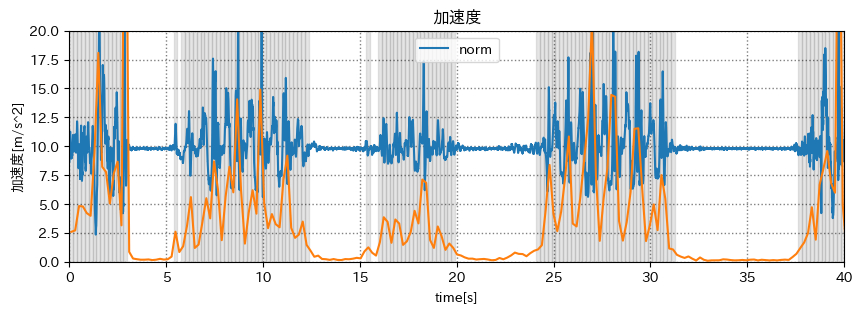

In [5]:
plot(
    df_acc,
    heads=[
        ("time", "norm"),
    ],
    title="加速度",
    xlabel="time[s]",
    ylabel="加速度[m/s^2]",
    xlim=(0, 40),
    ylim=(0, 20),
    interval_ms=200,
    threshold=1,
    grid=True,
)


サンプリング周波数: 446.93051292334985 Hz


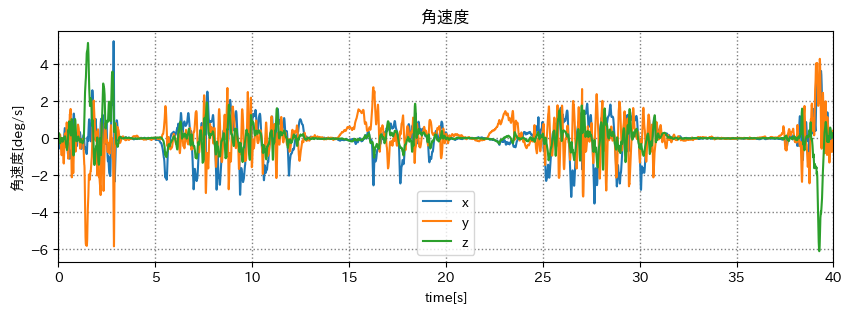

In [6]:
plot(
    df_gyro,
    heads=[
        ('time', 'x'),
        ('time', 'y'),
        ('time', 'z'),
    ],
    xlim=(0, 40),
    title="角速度",
    xlabel="time[s]",
    ylabel="角速度[deg/s]",
)


サンプリング周波数: 446.93051292334985 Hz


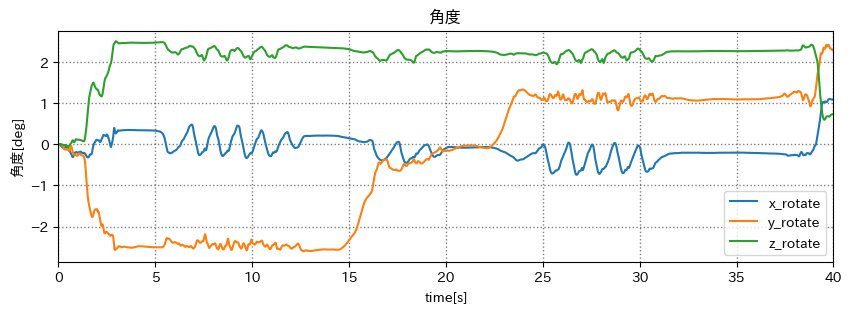

In [7]:
plot(
    df_gyro,
    heads=[
        ('time', 'x_rotate'),
        ('time', 'y_rotate'),
        ('time', 'z_rotate'),
    ],
    xlim=(0, 40),
    title="角度",
    xlabel="time[s]",
    ylabel="角度[deg]",
)
